# **PCA Tutorial**:

Understanding Dimensionality Reduction with PCA and SVD


In [2]:
## Step 1: Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Step 2: Load the dataset
data = pd.read_csv('Resources/california_housing_train.csv')
df = pd.DataFrame(data)

# Display the first few rows
print("Original Dataset:")
print(df.head())

Original Dataset:
   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -114.31     34.19                15.0       5612.0          1283.0   
1    -114.47     34.40                19.0       7650.0          1901.0   
2    -114.56     33.69                17.0        720.0           174.0   
3    -114.57     33.64                14.0       1501.0           337.0   
4    -114.57     33.57                20.0       1454.0           326.0   

   population  households  median_income  median_house_value  
0      1015.0       472.0         1.4936             66900.0  
1      1129.0       463.0         1.8200             80100.0  
2       333.0       117.0         1.6509             85700.0  
3       515.0       226.0         3.1917             73400.0  
4       624.0       262.0         1.9250             65500.0  


In [3]:
## Step 3: Selecting a subset of features
features = ['total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']
X = df[features]

print("\nSelected Features:")
print(X.head())


Selected Features:
   total_rooms  total_bedrooms  population  households  median_income
0       5612.0          1283.0      1015.0       472.0         1.4936
1       7650.0          1901.0      1129.0       463.0         1.8200
2        720.0           174.0       333.0       117.0         1.6509
3       1501.0           337.0       515.0       226.0         3.1917
4       1454.0           326.0       624.0       262.0         1.9250


In [4]:
## Step 4: Standardizing the data (important for PCA)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("\nStandardized Data (First 5 rows):")
print(X_scaled[:5])


Standardized Data (First 5 rows):
[[ 1.36169494  1.76420407 -0.36118401 -0.07599796 -1.25254316]
 [ 2.29660752  3.23044127 -0.26186523 -0.09940441 -1.08148298]
 [-0.88246225 -0.86695622 -0.95535424 -0.99925206 -1.17010515]
 [-0.52418613 -0.48023023 -0.79679269 -0.71577404 -0.36260047]
 [-0.54574692 -0.5063283  -0.70182999 -0.62214827 -1.02645443]]


In [5]:
## Step 5: Applying PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

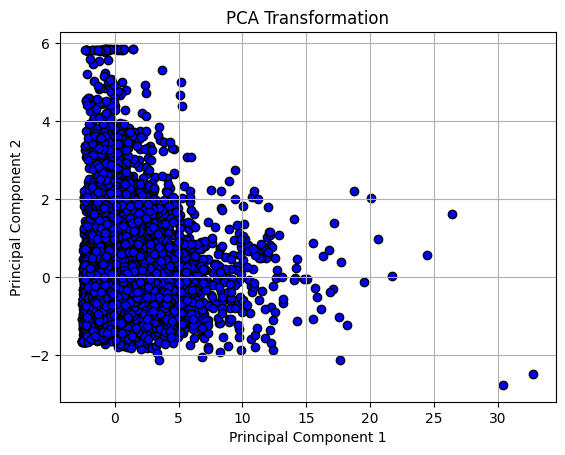

In [6]:
# Step 6: Visualizing PCA results
plt.scatter(X_pca[:, 0], X_pca[:, 1], c='blue', edgecolor='k')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Transformation')
plt.grid()
plt.show()


Verifying the importance of each PC, by calculating the correlation with the original attributes.

In [7]:
# Create a DataFrame from the PCA results
pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])

# Concatenate the PCA results with the original features
combined_df = pd.concat([pca_df, X], axis=1)

# Calculate the correlation
correlation_matrix = combined_df[['PC1', 'PC2', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']].corr()

print("\nCorrelation Matrix:")
correlation_matrix


Correlation Matrix:


,PC1,PC2,total_rooms,total_bedrooms,population,households,median_income
PC1,1.000000e+00,1.868806e-16,0.961138,0.979356,0.942035,0.984411,0.066148
PC2,1.868806e-16,1.000000e+00,0.144056,-0.078911,-0.070800,-0.061357,0.996559
total_rooms,9.611376e-01,1.440559e-01,1.000000,0.928403,0.860170,0.919018,0.195383
total_bedrooms,9.793558e-01,-7.891072e-02,0.928403,1.000000,0.881169,0.980920,-0.013495
population,9.420350e-01,-7.080002e-02,0.860170,0.881169,1.000000,0.909247,-0.000638
households,9.844109e-01,-6.135703e-02,0.919018,0.980920,0.909247,1.000000,0.007644
median_income,6.614840e-02,9.965591e-01,0.195383,-0.013495,-0.000638,0.007644,1.000000


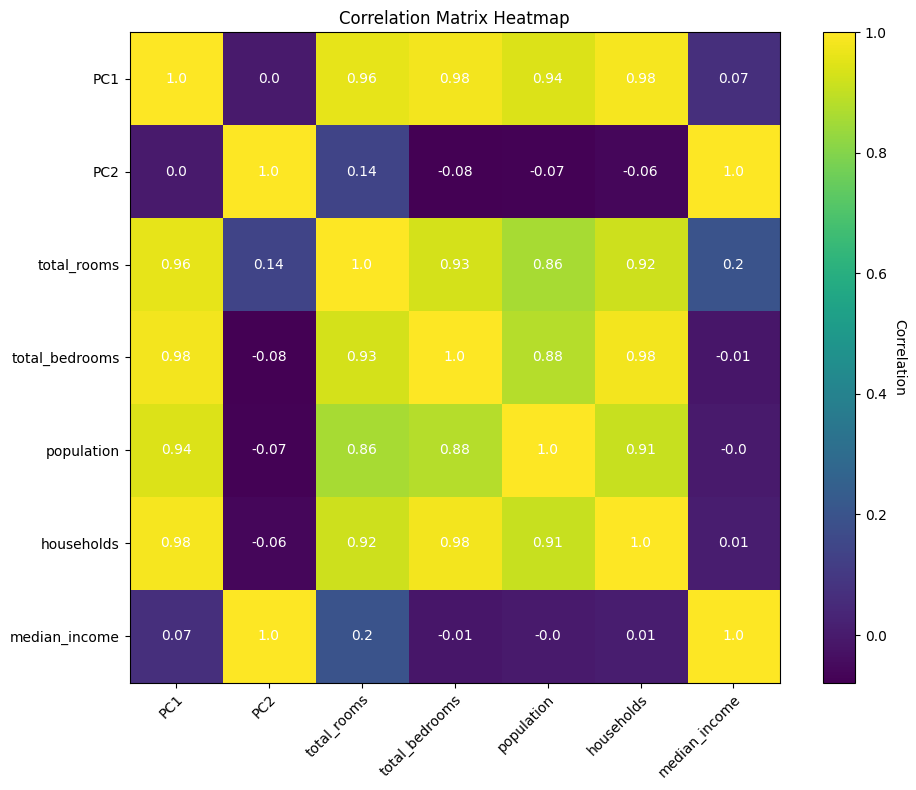

In [8]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,8))
im = ax.imshow(correlation_matrix, cmap='viridis') # Use a colormap suitable for heatmaps

# Add colorbar
cbar = ax.figure.colorbar(im, ax=ax)
cbar.ax.set_ylabel("Correlation", rotation=-90, va="bottom")

# Show all ticks and label them with the respective list entries
ax.set_xticks(np.arange(len(correlation_matrix.columns)))
ax.set_yticks(np.arange(len(correlation_matrix.index)))
ax.set_xticklabels(correlation_matrix.columns)
ax.set_yticklabels(correlation_matrix.index)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(correlation_matrix.index)):
    for j in range(len(correlation_matrix.columns)):
        text = ax.text(j, i, round(correlation_matrix.iloc[i, j],2),
                       ha="center", va="center", color="w")

ax.set_title("Correlation Matrix Heatmap")
fig.tight_layout()
plt.show()

What do you see about PC1 and PC2 in relation to the original features?

What about the correlation between PC1 and PC2?

In [9]:
## Step 7: Understanding PCA components
print("\nPrincipal Components (Eigenvectors):")
print(pca.components_)

print("\nExplained Variance Ratio (Importance of each component):")
print(pca.explained_variance_ratio_)


Principal Components (Eigenvectors):
[[ 0.49674055  0.5061562   0.48686782  0.50876879  0.03418719]
 [ 0.14201926 -0.0777951  -0.06979908 -0.06048959  0.98247013]]

Explained Variance Ratio (Importance of each component):
[0.74875875 0.20577729]


## **Theoretical Understanding of PCA with SVD**

Let us perform SVD on the correlation matrix.


Correlation Matrix:
[[ 1.00000000e+00  9.28402988e-01  8.60170341e-01  9.19018298e-01
   1.95382807e-01]
 [ 9.28402988e-01  1.00000000e+00  8.81168574e-01  9.80920092e-01
  -1.34946823e-02]
 [ 8.60170341e-01  8.81168574e-01  1.00000000e+00  9.09246530e-01
  -6.37629138e-04]
 [ 9.19018298e-01  9.80920092e-01  9.09246530e-01  1.00000000e+00
   7.64371620e-03]
 [ 1.95382807e-01 -1.34946823e-02 -6.37629138e-04  7.64371620e-03
   1.00000000e+00]]

Singular Values:
[3.74379375 1.02888646 0.1452599  0.06736458 0.01469532]

U matrix (Eigenvectors):
[[-0.49674055  0.14201926  0.30639115  0.78471747 -0.15304349]
 [-0.5061562  -0.0777951   0.37674181 -0.31608264  0.70420962]
 [-0.48686782 -0.06979908 -0.85834411  0.06507674  0.13076014]
 [-0.50876879 -0.06048959  0.1518811  -0.50290713 -0.67934665]
 [-0.03418719  0.98247013 -0.06608768 -0.16480198  0.04534766]]

Vt matrix (Eigenvectors transposed):
[[-0.49674055 -0.5061562  -0.48686782 -0.50876879 -0.03418719]
 [ 0.14201926 -0.0777951  -0.069799

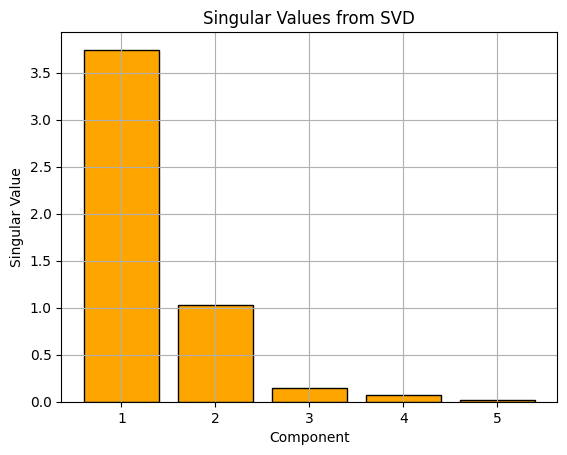

In [10]:
# Compute the correlation matrix
correlation_matrix = np.corrcoef(X_scaled.T)
print("\nCorrelation Matrix:")
print(correlation_matrix)

# Perform Singular Value Decomposition (SVD)
U, S, Vt = np.linalg.svd(correlation_matrix)

print("\nSingular Values:")
print(S)

print("\nU matrix (Eigenvectors):")
print(U)

print("\nVt matrix (Eigenvectors transposed):")
print(Vt)

# Visualizing singular values (importance of components)
plt.bar(range(1, len(S) + 1), S, color='orange', edgecolor='black')
plt.xlabel('Component')
plt.ylabel('Singular Value')
plt.title('Singular Values from SVD')
plt.grid()
plt.show()

# **Take aways**

1. PCA helps reduce the number of dimensions while retaining most information.
2. Standardization is crucial before applying PCA to ensure fair comparison across features.
3. The first few principal components explain most of the variance.
4. SVD decomposes the correlation matrix into eigenvectors and singular values.
5. Singular values indicate the importance of each principal component.

# Some things to think about
1. Try PCA with different numbers of components and analyze the explained variance.
2. Apply PCA to other subsets of features.
3. Investigate how SVD singular vectors relate to PCA components.